<a href="https://colab.research.google.com/github/rweebs/Kalkulator-Bot/blob/main/Copy_of_Tubes_Probstat_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Nama Lengkap : Rahmat Wibowo
- NIM : 18219040
- Sumber Dataset : Survei Sharing Vision 2020


# Inisiasi

Mengimport semua library yang dibutuhkan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN as NA
import re

In [ ]:
pd.options.display.max_columns = 700

# Data Cleaning & Preprocessing

Membuat DataFrame dan memuat data dari file xlsx

In [ ]:
dataset = pd.read_excel("/content/Survey eChannel Fintech eCommerce dan eLifestyle 2020_1.xlsx")
dataset.head()

,Nama Surveyor (Mahasiswa ),NIM Surveyor (Mahasiswa),Kelas Surveyor (Mahasiswa),Unnamed: 3,Nama Responden,Jenis kelamin ?,Unnamed: 6,Usia :,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Pendidikan Terakhir?,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Pekerjaan?,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Penghasilan per bulan?,Unnamed: 27,Unnamed: 28,Unnamed: 29,Domisili saat ini,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?,Unnamed: 38,Unnamed: 39,Rata-rata durasi menggunakan internet Aktif tiap hari ?,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Akses atau provider internet yang digunakan selama ini?,Unnamed: 50,Unnamed: 51,Unnamed: 52,Berapa pengeluaran Anda untukÂ belanja kebutuhan internet (baik mobile data maupun paket broadband/ wifi) per bulan ?,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Manakah dari aktivitas berikut yang mengalami peningkatan selama 3 bulan terakhir?,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Bagaimana frekuensi dari aktivitas yang mengalami peningkatan selama 3 bulan terakhir berikut?,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,"Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?",Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Media komunikasi yang paling sering digunakan untuk Work From Home/Â School From Home ?,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Aplikasi apa yang biasa digunakan untuk Work From Home/ School from Home ?,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Alasan menggunakan aplikasi tersebut (Mohon sebutkan 3 alasan utama),Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Apakah Anda menggunakan layanan-layanan bank berikut?,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Mohon sebutkan nama bank untuk layanan yang Anda gunakan,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Bagaimana frekuensi peng

Membersihkan data dengan cara menghilangkan spesial character dengan regex dan membuat data berformat title, jika data merupakan string

In [ ]:
dataset = dataset.replace(regex=True,to_replace='[^a-zA-Z0-9+-=<> ]',value='')

for j in dataset.columns:
  for k in range (dataset.shape[0]):
    if (isinstance(dataset[j][k],str)):
      dataset[j][k]=dataset[j][k].title()

In [ ]:
# Melihat banyaknya data pada dataset, didapat ada 2021 data pada dataset
dataset.shape

(2021, 610)

In [ ]:
# Membersihkan data dari duplicate berdasarkan Column "Nama Responden"
dataset.drop_duplicates(subset=["Nama Surveyor (Mahasiswa )","Nama Responden"],keep="last",inplace=True)

In [ ]:
dataset.head()

,Nama Surveyor (Mahasiswa ),NIM Surveyor (Mahasiswa),Kelas Surveyor (Mahasiswa),Unnamed: 3,Nama Responden,Jenis kelamin ?,Unnamed: 6,Usia :,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Pendidikan Terakhir?,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Pekerjaan?,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Penghasilan per bulan?,Unnamed: 27,Unnamed: 28,Unnamed: 29,Domisili saat ini,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?,Unnamed: 38,Unnamed: 39,Rata-rata durasi menggunakan internet Aktif tiap hari ?,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Akses atau provider internet yang digunakan selama ini?,Unnamed: 50,Unnamed: 51,Unnamed: 52,Berapa pengeluaran Anda untukÂ belanja kebutuhan internet (baik mobile data maupun paket broadband/ wifi) per bulan ?,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Manakah dari aktivitas berikut yang mengalami peningkatan selama 3 bulan terakhir?,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Bagaimana frekuensi dari aktivitas yang mengalami peningkatan selama 3 bulan terakhir berikut?,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,"Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?",Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Media komunikasi yang paling sering digunakan untuk Work From Home/Â School From Home ?,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Aplikasi apa yang biasa digunakan untuk Work From Home/ School from Home ?,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Alasan menggunakan aplikasi tersebut (Mohon sebutkan 3 alasan utama),Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Apakah Anda menggunakan layanan-layanan bank berikut?,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Mohon sebutkan nama bank untuk layanan yang Anda gunakan,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Bagaimana frekuensi peng

In [ ]:
# Melihat banyaknya data pada dataset setelah duplikasi data dihilangkan, Didapat 1174 data tanpa duplikasi
dataset.shape

(1861, 610)

In [ ]:
# Mendrop Column Nama Surveyor, NIM Surveyor, Kelas, dan Nama Responden
dataset=dataset.iloc[0:,5:]
dataset.reset_index(drop=True,inplace=True)
dataset.head()

,Jenis kelamin ?,Unnamed: 6,Usia :,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Pendidikan Terakhir?,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Pekerjaan?,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Penghasilan per bulan?,Unnamed: 27,Unnamed: 28,Unnamed: 29,Domisili saat ini,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?,Unnamed: 38,Unnamed: 39,Rata-rata durasi menggunakan internet Aktif tiap hari ?,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Akses atau provider internet yang digunakan selama ini?,Unnamed: 50,Unnamed: 51,Unnamed: 52,Berapa pengeluaran Anda untukÂ belanja kebutuhan internet (baik mobile data maupun paket broadband/ wifi) per bulan ?,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Manakah dari aktivitas berikut yang mengalami peningkatan selama 3 bulan terakhir?,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Bagaimana frekuensi dari aktivitas yang mengalami peningkatan selama 3 bulan terakhir berikut?,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,"Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?",Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Media komunikasi yang paling sering digunakan untuk Work From Home/Â School From Home ?,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Aplikasi apa yang biasa digunakan untuk Work From Home/ School from Home ?,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Alasan menggunakan aplikasi tersebut (Mohon sebutkan 3 alasan utama),Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Apakah Anda menggunakan layanan-layanan bank berikut?,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Mohon sebutkan nama bank untuk layanan yang Anda gunakan,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Bagaimana frekuensi penggunaan Channel Bank berikut?,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 25

In [ ]:
def merged_data(start,end):
  current_column=dataset.columns[start]
  for i in range(start,end):
    current_column=dataset.columns[i]
    count=0
    for j in dataset[current_column]:
      if (isinstance(j,int)):
        dataset[current_column][count]=dataset[current_column][0]
      count+=1
 

In [ ]:
 merged_data(0,605)

In [ ]:
dataset.rename(columns={"Unnamed: 52":"Nama Broadband"},inplace=True)
dataset.rename(columns={'Berapa pengeluaran Anda untukÂ\xa0belanja kebutuhan internet (baik mobile data maupun paket broadband/ wifi) per bulan ?':"Pengeluaran Mobile Data"},inplace=True)
dataset.rename(columns={"Unnamed: 59":"Pengeluaran Broadband"},inplace=True)
dataset.head()


,Jenis kelamin ?,Unnamed: 6,Usia :,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Pendidikan Terakhir?,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Pekerjaan?,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Penghasilan per bulan?,Unnamed: 27,Unnamed: 28,Unnamed: 29,Domisili saat ini,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?,Unnamed: 38,Unnamed: 39,Rata-rata durasi menggunakan internet Aktif tiap hari ?,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Akses atau provider internet yang digunakan selama ini?,Unnamed: 50,Unnamed: 51,Nama Broadband,Pengeluaran Mobile Data,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Pengeluaran Broadband,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Manakah dari aktivitas berikut yang mengalami peningkatan selama 3 bulan terakhir?,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Bagaimana frekuensi dari aktivitas yang mengalami peningkatan selama 3 bulan terakhir berikut?,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,"Dalam 3 bulan terakhir (terkait pandemic), bagaimana kecenderungan Anda dalam melakukan kegiatan berikut?",Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Media komunikasi yang paling sering digunakan untuk Work From Home/Â School From Home ?,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Aplikasi apa yang biasa digunakan untuk Work From Home/ School from Home ?,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Alasan menggunakan aplikasi tersebut (Mohon sebutkan 3 alasan utama),Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Apakah Anda menggunakan layanan-layanan bank berikut?,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Mohon sebutkan nama bank untuk layanan yang Anda gunakan,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Bagaimana frekuensi penggunaan Channel Bank berikut?,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261,U

In [ ]:
def rename_unnamed(i):
  dataset.rename(columns={dataset.columns[i]:dataset[dataset.columns[i]][0]},inplace=True)
def rename_concat(column_name,concat):
  dataset.rename(columns={column_name:concat+" "+column_name},inplace=True)
def rename(i,column_new_name):
  dataset.rename(columns={dataset.columns[i]:column_new_name},inplace=True)

In [ ]:
for i in range (60,72):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Peningkatan aktivitas:")
for i in range (174,180):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Media komunikasi untuk WFH:")
for i in range (180,188):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Aplikasi untuk WFH:")
for i in range (188,195):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Alasan menggunakan aplikasi tersebut:")
for i in range (195,201):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Pengguna layanan Bank:")
for i in range (201,244):
  rename_unnamed(i)
rename_concat(dataset.columns[243],"Layanan bank:")
for i in range (269,304):
  rename_unnamed(i)
rename_concat(dataset.columns[303],"Keluhan / Kerugian apa yang pernah Anda alami saat menggunakan layanan eChannel bank (ATM, internet banking, mobile banking, sms banking, CC)")
for i in range (307,314):
  rename_unnamed(i)
rename_concat(dataset.columns[313],"Bank Online:")
for i in range (314,319):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"alasan Anda menggunakan bank full online:")
for i in range (328,335):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Kerugian/ Keluhan apa yang pernah Anda yang dialami selama menggunakan bank full online:")
for i in range (335,340):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Alasan tidak membuka rekening online:")
for i in range (343,356):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Pengguna emoney:")
for i in range (356,363):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Alasan menggunakan emoney:")
for i in range (363,375):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Keperluan emoney:")
for i in range (397,403):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Kendala emoney:")
for i in range (405,410):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"QR Code:")
for i in range (410,417):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Tempat Menggunakan QR Code:")
for i in range (420,430):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Belanja online yang meningkat:")
rename(430,"Kecenderungan Pembelian: Fashion / Mode")
rename(432,"Kecenderungan Pembelian: Groceries / Keperluan Sehari-Hari")
rename(434,"Kecenderungan Pembelian: Handphone")
rename(436,"Kecenderungan Pembelian: Laptop/Computer")
rename(438,"Kecenderungan Pembelian: Alat Elektronik Rumah Tangga")
rename(440,"Kecenderungan Pembelian: Kosmetik Alat Kecantikan/ Perawatan Badan")
rename(442,"Kecenderungan Pembelian: Buku, Hobi Koleksi")
rename(444,"Kecenderungan Pembelian: Pulsa Data Komunikasi")
rename(446,"Kecenderungan Pembelian: Makanan Minuman")
rename(448,"Kecenderungan Pembelian: Tiket Pesawat")
rename(450,"Kecenderungan Pembelian: Tiket Kereta Api")
rename(452,"Kecenderungan Pembelian: Hotel")
rename(454,"Kecenderungan Pembelian: Tiket Bioskop")
rename(456,"Kecenderungan Pembelian: Tiket Wisata")
for i in range (458,466):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Tempat belanja online:")
for i in range (466,477):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Toko online:")
for i in range (477,484):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Alasan belanja online:")
for i in range (484,493):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Alasan belanja offline:")
for i in range (493,503):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Metode pembayaran toko online:")
for i in range (503,510):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"keluhan yang pernah dialami saat belanja toko online:")
for i in range (515,525):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Alasan belanja melalui sosmed:")
for i in range (525,534):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"keluhan belanja melalui sosmed:")
for i in range (537,553):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Pengguna Fintech Lending:")
for i in range (553,559):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Alasan Penggunaan Fintech Lending:")
for i in range (559,567):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Tujuan Penggunaan Fintech Lending:")
for i in range (584,590):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Kendala Penggunaan Fintech Lending:")
for i in range (590,596):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Fintech market provisioning:")
for i in range (596,601):
  rename_unnamed(i)
  rename_concat(dataset.columns[i],"Fintech investasi:")

rename(72,"Frekuensi: Belanja Online")
rename(80,"Frekuensi: Streaming Video")
rename(88,"Frekuensi: Melakukan Video Conference")
rename(96,"Frekuensi: Delivery Makanan")
rename(104,"Frekuensi: Mengikuti kelas olahraga secara online")
rename(112,"Frekuensi: Mengikuti kelas online")
rename(120,"Frekuensi: Akses media sosial")
rename(128,"Frekuensi: Game online")
rename(136,"Frekuensi: Menonton e-sport ")
rename(144,"Frekuensi: Membeli obat-obatan secara online")
rename(152,"Frekuensi: Melakukan konsultasi kesehatan secara online")
rename(160,"Kecenderungan Belajar")
rename(162,"Kecenderungan Meeting")
rename(164,"Kecenderungan Mengikuti Workshop")
rename(166,"Kecenderungan Menonton Film")
rename(168,"Kecenderungan Menonton Konser")
rename(170,"Kecenderungan Family/ social gathering")
rename(172,"Kecenderungan Konsultasi masalah kesehatan")
rename(244,"Frekuensi ATM:")
rename(249,"Frekuensi Internet Banking:")
rename(254,"Frekuensi Mobile Banking:")
rename(259,"Frekuensi SMS Banking:")
rename(264,"Frekuensi Datang ke Cabang Bank:")
dataset.head(2)

,Jenis kelamin ?,Unnamed: 6,Usia :,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Pendidikan Terakhir?,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Pekerjaan?,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Penghasilan per bulan?,Unnamed: 27,Unnamed: 28,Unnamed: 29,Domisili saat ini,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?,Unnamed: 38,Unnamed: 39,Rata-rata durasi menggunakan internet Aktif tiap hari ?,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Akses atau provider internet yang digunakan selama ini?,Unnamed: 50,Unnamed: 51,Nama Broadband,Pengeluaran Mobile Data,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Pengeluaran Broadband,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Peningkatan aktivitas: Berbelanja Online,Peningkatan aktivitas: Streaming Video/ Film,Peningkatan aktivitas: Melakukan Video Conference,Peningkatan aktivitas: Delivery Makanan,Peningkatan aktivitas: Mengikuti Kelas Olahraga Secara Online,Peningkatan aktivitas: Mengikuti Kelas Online,Peningkatan aktivitas: Akses Media Sosial,Peningkatan aktivitas: Game Online,Peningkatan aktivitas: Menonton E-Sport,Peningkatan aktivitas: Membeli Obat-Obatan Secara Online,Peningkatan aktivitas: Melakukan Konsultasi Kesehatan Secara Online,"Peningkatan aktivitas: Lainnya, Mohon Sebutkan",Frekuensi: Belanja Online,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Frekuensi: Streaming Video,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Frekuensi: Melakukan Video Conference,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Frekuensi: Delivery Makanan,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Frekuensi: Mengikuti kelas olahraga secara online,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Frekuensi: Mengikuti kelas online,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Frekuensi: Akses media sosial,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Frekuensi: Game online,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Frekuensi: Menonton e-sport,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Frekuensi: Membeli obat-obatan secara online,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Frekuensi: Melakukan konsultasi kesehatan secara online,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Kecenderungan Belajar,Unnamed: 166,Kecenderungan Meeting,Unnamed: 168,Kecenderungan Mengikuti Workshop,Unnamed: 170,Kecenderungan Menonton Film,Unnamed: 172,Kecenderungan Menonton Konser,Unnamed: 174,Kecenderungan Family/ social gathering,Unnamed: 176,Kecenderungan Konsultasi masalah kesehatan,Unnamed: 178,Media komunikasi untuk WFH: Email,Media komunikasi untuk WFH: Chatting,Media komunikasi untuk WFH: Conference Call Video/ Audio,Media komunikasi untuk WFH: Video Streaming,Media komunikasi untuk WFH: Web Download,"Media komunikasi untuk WFH: Lainnya, Sebutkan",Aplikasi untuk WFH: Whatsapp,Aplikasi untuk WFH: Zoom,Aplikasi untuk WFH: Google Meet,Aplikasi untuk WFH: Microsoft Team,Aplikasi untuk WFH: Cisco Webex,Aplikasi untuk WFH: Skype For Business,Aplikasi untuk WFH: Gotomeeting,"Aplikasi untuk WFH: Lainnya, Sebutkan",Alasan menggunakan aplikasi tersebut: Mudah Digunakan,Alasan menggunakan aplikasi tersebut: Digunakan Banyak Orang,Alasan menggunakan aplikasi tersebut: Hemat Kuota/ Bandwidth,Alasan menggunakan aplikasi tersebut: Lebih Aman,Alasan menggunakan aplikasi tersebut: Durasi Panggilan Tanpa Batas,Alasan menggunakan aplikasi 

In [ ]:
current_column=dataset.columns[0]
for i in range(605):
  if ((dataset.columns[i]).find("Unnamed")):
    current_column=dataset.columns[i]
  else:
    dataset[current_column].fillna(dataset["Unnamed: "+str(i+5)],inplace=True)
  


In [ ]:
total_unnamed=0
for i in range(605):
  current_column=dataset.columns[i]
  if (current_column.find("Unnamed")==False):
    total_unnamed+=1
print(total_unnamed)

220


In [ ]:
dataset.head()

,Jenis kelamin ?,Unnamed: 6,Usia :,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Pendidikan Terakhir?,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Pekerjaan?,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Penghasilan per bulan?,Unnamed: 27,Unnamed: 28,Unnamed: 29,Domisili saat ini,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?,Unnamed: 38,Unnamed: 39,Rata-rata durasi menggunakan internet Aktif tiap hari ?,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Akses atau provider internet yang digunakan selama ini?,Unnamed: 50,Unnamed: 51,Nama Broadband,Pengeluaran Mobile Data,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Pengeluaran Broadband,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Peningkatan aktivitas: Berbelanja Online,Peningkatan aktivitas: Streaming Video/ Film,Peningkatan aktivitas: Melakukan Video Conference,Peningkatan aktivitas: Delivery Makanan,Peningkatan aktivitas: Mengikuti Kelas Olahraga Secara Online,Peningkatan aktivitas: Mengikuti Kelas Online,Peningkatan aktivitas: Akses Media Sosial,Peningkatan aktivitas: Game Online,Peningkatan aktivitas: Menonton E-Sport,Peningkatan aktivitas: Membeli Obat-Obatan Secara Online,Peningkatan aktivitas: Melakukan Konsultasi Kesehatan Secara Online,"Peningkatan aktivitas: Lainnya, Mohon Sebutkan",Frekuensi: Belanja Online,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Frekuensi: Streaming Video,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Frekuensi: Melakukan Video Conference,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Frekuensi: Delivery Makanan,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Frekuensi: Mengikuti kelas olahraga secara online,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Frekuensi: Mengikuti kelas online,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Frekuensi: Akses media sosial,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Frekuensi: Game online,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Frekuensi: Menonton e-sport,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Frekuensi: Membeli obat-obatan secara online,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Frekuensi: Melakukan konsultasi kesehatan secara online,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Kecenderungan Belajar,Unnamed: 166,Kecenderungan Meeting,Unnamed: 168,Kecenderungan Mengikuti Workshop,Unnamed: 170,Kecenderungan Menonton Film,Unnamed: 172,Kecenderungan Menonton Konser,Unnamed: 174,Kecenderungan Family/ social gathering,Unnamed: 176,Kecenderungan Konsultasi masalah kesehatan,Unnamed: 178,Media komunikasi untuk WFH: Email,Media komunikasi untuk WFH: Chatting,Media komunikasi untuk WFH: Conference Call Video/ Audio,Media komunikasi untuk WFH: Video Streaming,Media komunikasi untuk WFH: Web Download,"Media komunikasi untuk WFH: Lainnya, Sebutkan",Aplikasi untuk WFH: Whatsapp,Aplikasi untuk WFH: Zoom,Aplikasi untuk WFH: Google Meet,Aplikasi untuk WFH: Microsoft Team,Aplikasi untuk WFH: Cisco Webex,Aplikasi untuk WFH: Skype For Business,Aplikasi untuk WFH: Gotomeeting,"Aplikasi untuk WFH: Lainnya, Sebutkan",Alasan menggunakan aplikasi tersebut: Mudah Digunakan,Alasan menggunakan aplikasi tersebut: Digunakan Banyak Orang,Alasan menggunakan aplikasi tersebut: Hemat Kuota/ Bandwidth,Alasan menggunakan aplikasi tersebut: Lebih Aman,Alasan menggunakan aplikasi tersebut: Durasi Panggilan Tanpa Batas,Alasan menggunakan aplikasi 

In [ ]:
count=0
while (count<=605-total_unnamed):
  try:
    current_column=dataset.columns[count]
    if (current_column.find("Unnamed")==0):
      dataset.drop(columns=current_column,inplace=True)
    else:
      count+=1
  except IndexError:
    break

In [ ]:
dataset.shape
dataset.drop(index=0,inplace=True)
dataset.reset_index(drop=True)

,Jenis kelamin ?,Usia :,Pendidikan Terakhir?,Pekerjaan?,Penghasilan per bulan?,Domisili saat ini,Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?,Rata-rata durasi menggunakan internet Aktif tiap hari ?,Akses atau provider internet yang digunakan selama ini?,Nama Broadband,Pengeluaran Mobile Data,Pengeluaran Broadband,Peningkatan aktivitas: Berbelanja Online,Peningkatan aktivitas: Streaming Video/ Film,Peningkatan aktivitas: Melakukan Video Conference,Peningkatan aktivitas: Delivery Makanan,Peningkatan aktivitas: Mengikuti Kelas Olahraga Secara Online,Peningkatan aktivitas: Mengikuti Kelas Online,Peningkatan aktivitas: Akses Media Sosial,Peningkatan aktivitas: Game Online,Peningkatan aktivitas: Menonton E-Sport,Peningkatan aktivitas: Membeli Obat-Obatan Secara Online,Peningkatan aktivitas: Melakukan Konsultasi Kesehatan Secara Online,"Peningkatan aktivitas: Lainnya, Mohon Sebutkan",Frekuensi: Belanja Online,Frekuensi: Streaming Video,Frekuensi: Melakukan Video Conference,Frekuensi: Delivery Makanan,Frekuensi: Mengikuti kelas olahraga secara online,Frekuensi: Mengikuti kelas online,Frekuensi: Akses media sosial,Frekuensi: Game online,Frekuensi: Menonton e-sport,Frekuensi: Membeli obat-obatan secara online,Frekuensi: Melakukan konsultasi kesehatan secara online,Kecenderungan Belajar,Kecenderungan Meeting,Kecenderungan Mengikuti Workshop,Kecenderungan Menonton Film,Kecenderungan Menonton Konser,Kecenderungan Family/ social gathering,Kecenderungan Konsultasi masalah kesehatan,Media komunikasi untuk WFH: Email,Media komunikasi untuk WFH: Chatting,Media komunikasi untuk WFH: Conference Call Video/ Audio,Media komunikasi untuk WFH: Video Streaming,Media komunikasi untuk WFH: Web Download,"Media komunikasi untuk WFH: Lainnya, Sebutkan",Aplikasi untuk WFH: Whatsapp,Aplikasi untuk WFH: Zoom,Aplikasi untuk WFH: Google Meet,Aplikasi untuk WFH: Microsoft Team,Aplikasi untuk WFH: Cisco Webex,Aplikasi untuk WFH: Skype For Business,Aplikasi untuk WFH: Gotomeeting,"Aplikasi untuk WFH: Lainnya, Sebutkan",Alasan menggunakan aplikasi tersebut: Mudah Digunakan,Alasan menggunakan aplikasi tersebut: Digunakan Banyak Orang,Alasan menggunakan aplikasi tersebut: Hemat Kuota/ Bandwidth,Alasan menggunakan aplikasi tersebut: Lebih Aman,Alasan menggunakan aplikasi tersebut: Durasi Panggilan Tanpa Batas,Alasan menggunakan aplikasi tersebut: Telah Ditentukan Oleh Perusahaan Atau Pihak Yang Lebih Berwenang,"Alasan menggunakan aplikasi tersebut: Lainnya, Sebutkan",Pengguna layanan Bank: Atm,Pengguna layanan Bank: Internet Banking,Pengguna layanan Bank: Mobile Banking,Pengguna layanan Bank: Sms Banking,Pengguna layanan Bank: Kartu Kredit,Pengguna layanan Bank: Datang Ke Kantor Cabang,Atm - Bank Bri,Atm - Bank Bni,Atm - Bank Mandiri,Atm - Bank Bca,Atm - Bank Cimb Niaga,Atm - Bank Btn,Atm - Bank Permata,Internet Banking - Bank Bri,Internet Banking - Bank Bni,Internet Banking - Bank Mandiri,Internet Banking - Bank Bca,Internet Banking - Bank Cimb Niaga,Internet Banking - Bank Btn,Internet Banking - Bank Permata,Mobile Banking - Bank Bri,Mobile Banking - Bank Bni,Mobile Banking - Bank Mandiri,Mobile Banking - Bank Bca,Mobile Banking - Bank Cimb Niaga,Mobile Banking - Bank Btn,Mobile Banking - Bank Permata,Sms Banking - Bank Bri,Sms Banking - Bank Bni,Sms Banking - Bank Mandiri,Sms Banking - Bank Bca,Sms Banking - Bank Cimb Niaga,Sms Banking - Bank Btn,Sms Banking - Bank Permata,Kartu Kredit - Bank Bri,Kartu Kredit - Bank Bni,Kartu Kredit - Bank Mandiri,Kartu Kredit - Bank Bca,Kartu Kredit - Bank Cimb Niaga,Kartu Kredit - Bank Btn,Kartu Kredit - Bank Permata,Datang Ke Kantor Cabang - Bank Bri,Datang Ke Kantor Cabang - Bank Bni,Datang Ke Kantor Cabang - Bank Mandiri,Datang Ke Kantor Cabang - Bank Bca,Datang Ke Kantor Cabang - Bank Cimb Niaga,Datang Ke Kantor Cabang - Bank Btn,Datang Ke Kantor Cabang - Bank Permata,"Layanan bank: Lainnya, Mohon Sebutkan",Frekuensi ATM:,Frekuensi Internet Banking:,Frekuensi Mobile Banking:,Frekuensi SMS Banking:,Frekuensi 

In [ ]:
dataset.head()

,Jenis kelamin ?,Usia :,Pendidikan Terakhir?,Pekerjaan?,Penghasilan per bulan?,Domisili saat ini,Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?,Rata-rata durasi menggunakan internet Aktif tiap hari ?,Akses atau provider internet yang digunakan selama ini?,Nama Broadband,Pengeluaran Mobile Data,Pengeluaran Broadband,Peningkatan aktivitas: Berbelanja Online,Peningkatan aktivitas: Streaming Video/ Film,Peningkatan aktivitas: Melakukan Video Conference,Peningkatan aktivitas: Delivery Makanan,Peningkatan aktivitas: Mengikuti Kelas Olahraga Secara Online,Peningkatan aktivitas: Mengikuti Kelas Online,Peningkatan aktivitas: Akses Media Sosial,Peningkatan aktivitas: Game Online,Peningkatan aktivitas: Menonton E-Sport,Peningkatan aktivitas: Membeli Obat-Obatan Secara Online,Peningkatan aktivitas: Melakukan Konsultasi Kesehatan Secara Online,"Peningkatan aktivitas: Lainnya, Mohon Sebutkan",Frekuensi: Belanja Online,Frekuensi: Streaming Video,Frekuensi: Melakukan Video Conference,Frekuensi: Delivery Makanan,Frekuensi: Mengikuti kelas olahraga secara online,Frekuensi: Mengikuti kelas online,Frekuensi: Akses media sosial,Frekuensi: Game online,Frekuensi: Menonton e-sport,Frekuensi: Membeli obat-obatan secara online,Frekuensi: Melakukan konsultasi kesehatan secara online,Kecenderungan Belajar,Kecenderungan Meeting,Kecenderungan Mengikuti Workshop,Kecenderungan Menonton Film,Kecenderungan Menonton Konser,Kecenderungan Family/ social gathering,Kecenderungan Konsultasi masalah kesehatan,Media komunikasi untuk WFH: Email,Media komunikasi untuk WFH: Chatting,Media komunikasi untuk WFH: Conference Call Video/ Audio,Media komunikasi untuk WFH: Video Streaming,Media komunikasi untuk WFH: Web Download,"Media komunikasi untuk WFH: Lainnya, Sebutkan",Aplikasi untuk WFH: Whatsapp,Aplikasi untuk WFH: Zoom,Aplikasi untuk WFH: Google Meet,Aplikasi untuk WFH: Microsoft Team,Aplikasi untuk WFH: Cisco Webex,Aplikasi untuk WFH: Skype For Business,Aplikasi untuk WFH: Gotomeeting,"Aplikasi untuk WFH: Lainnya, Sebutkan",Alasan menggunakan aplikasi tersebut: Mudah Digunakan,Alasan menggunakan aplikasi tersebut: Digunakan Banyak Orang,Alasan menggunakan aplikasi tersebut: Hemat Kuota/ Bandwidth,Alasan menggunakan aplikasi tersebut: Lebih Aman,Alasan menggunakan aplikasi tersebut: Durasi Panggilan Tanpa Batas,Alasan menggunakan aplikasi tersebut: Telah Ditentukan Oleh Perusahaan Atau Pihak Yang Lebih Berwenang,"Alasan menggunakan aplikasi tersebut: Lainnya, Sebutkan",Pengguna layanan Bank: Atm,Pengguna layanan Bank: Internet Banking,Pengguna layanan Bank: Mobile Banking,Pengguna layanan Bank: Sms Banking,Pengguna layanan Bank: Kartu Kredit,Pengguna layanan Bank: Datang Ke Kantor Cabang,Atm - Bank Bri,Atm - Bank Bni,Atm - Bank Mandiri,Atm - Bank Bca,Atm - Bank Cimb Niaga,Atm - Bank Btn,Atm - Bank Permata,Internet Banking - Bank Bri,Internet Banking - Bank Bni,Internet Banking - Bank Mandiri,Internet Banking - Bank Bca,Internet Banking - Bank Cimb Niaga,Internet Banking - Bank Btn,Internet Banking - Bank Permata,Mobile Banking - Bank Bri,Mobile Banking - Bank Bni,Mobile Banking - Bank Mandiri,Mobile Banking - Bank Bca,Mobile Banking - Bank Cimb Niaga,Mobile Banking - Bank Btn,Mobile Banking - Bank Permata,Sms Banking - Bank Bri,Sms Banking - Bank Bni,Sms Banking - Bank Mandiri,Sms Banking - Bank Bca,Sms Banking - Bank Cimb Niaga,Sms Banking - Bank Btn,Sms Banking - Bank Permata,Kartu Kredit - Bank Bri,Kartu Kredit - Bank Bni,Kartu Kredit - Bank Mandiri,Kartu Kredit - Bank Bca,Kartu Kredit - Bank Cimb Niaga,Kartu Kredit - Bank Btn,Kartu Kredit - Bank Permata,Datang Ke Kantor Cabang - Bank Bri,Datang Ke Kantor Cabang - Bank Bni,Datang Ke Kantor Cabang - Bank Mandiri,Datang Ke Kantor Cabang - Bank Bca,Datang Ke Kantor Cabang - Bank Cimb Niaga,Datang Ke Kantor Cabang - Bank Btn,Datang Ke Kantor Cabang - Bank Permata,"Layanan bank: Lainnya, Mohon Sebutkan",Frekuensi ATM:,Frekuensi Internet Banking:,Frekuensi Mobile Banking:,Frekuensi SMS Banking:,Frekuensi 

In [ ]:
dataset.describe()

,Jenis kelamin ?,Usia :,Pendidikan Terakhir?,Pekerjaan?,Penghasilan per bulan?,Domisili saat ini,Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?,Rata-rata durasi menggunakan internet Aktif tiap hari ?,Akses atau provider internet yang digunakan selama ini?,Nama Broadband,Pengeluaran Mobile Data,Pengeluaran Broadband,Peningkatan aktivitas: Berbelanja Online,Peningkatan aktivitas: Streaming Video/ Film,Peningkatan aktivitas: Melakukan Video Conference,Peningkatan aktivitas: Delivery Makanan,Peningkatan aktivitas: Mengikuti Kelas Olahraga Secara Online,Peningkatan aktivitas: Mengikuti Kelas Online,Peningkatan aktivitas: Akses Media Sosial,Peningkatan aktivitas: Game Online,Peningkatan aktivitas: Menonton E-Sport,Peningkatan aktivitas: Membeli Obat-Obatan Secara Online,Peningkatan aktivitas: Melakukan Konsultasi Kesehatan Secara Online,"Peningkatan aktivitas: Lainnya, Mohon Sebutkan",Frekuensi: Belanja Online,Frekuensi: Streaming Video,Frekuensi: Melakukan Video Conference,Frekuensi: Delivery Makanan,Frekuensi: Mengikuti kelas olahraga secara online,Frekuensi: Mengikuti kelas online,Frekuensi: Akses media sosial,Frekuensi: Game online,Frekuensi: Menonton e-sport,Frekuensi: Membeli obat-obatan secara online,Frekuensi: Melakukan konsultasi kesehatan secara online,Kecenderungan Belajar,Kecenderungan Meeting,Kecenderungan Mengikuti Workshop,Kecenderungan Menonton Film,Kecenderungan Menonton Konser,Kecenderungan Family/ social gathering,Kecenderungan Konsultasi masalah kesehatan,Media komunikasi untuk WFH: Email,Media komunikasi untuk WFH: Chatting,Media komunikasi untuk WFH: Conference Call Video/ Audio,Media komunikasi untuk WFH: Video Streaming,Media komunikasi untuk WFH: Web Download,"Media komunikasi untuk WFH: Lainnya, Sebutkan",Aplikasi untuk WFH: Whatsapp,Aplikasi untuk WFH: Zoom,Aplikasi untuk WFH: Google Meet,Aplikasi untuk WFH: Microsoft Team,Aplikasi untuk WFH: Cisco Webex,Aplikasi untuk WFH: Skype For Business,Aplikasi untuk WFH: Gotomeeting,"Aplikasi untuk WFH: Lainnya, Sebutkan",Alasan menggunakan aplikasi tersebut: Mudah Digunakan,Alasan menggunakan aplikasi tersebut: Digunakan Banyak Orang,Alasan menggunakan aplikasi tersebut: Hemat Kuota/ Bandwidth,Alasan menggunakan aplikasi tersebut: Lebih Aman,Alasan menggunakan aplikasi tersebut: Durasi Panggilan Tanpa Batas,Alasan menggunakan aplikasi tersebut: Telah Ditentukan Oleh Perusahaan Atau Pihak Yang Lebih Berwenang,"Alasan menggunakan aplikasi tersebut: Lainnya, Sebutkan",Pengguna layanan Bank: Atm,Pengguna layanan Bank: Internet Banking,Pengguna layanan Bank: Mobile Banking,Pengguna layanan Bank: Sms Banking,Pengguna layanan Bank: Kartu Kredit,Pengguna layanan Bank: Datang Ke Kantor Cabang,Atm - Bank Bri,Atm - Bank Bni,Atm - Bank Mandiri,Atm - Bank Bca,Atm - Bank Cimb Niaga,Atm - Bank Btn,Atm - Bank Permata,Internet Banking - Bank Bri,Internet Banking - Bank Bni,Internet Banking - Bank Mandiri,Internet Banking - Bank Bca,Internet Banking - Bank Cimb Niaga,Internet Banking - Bank Btn,Internet Banking - Bank Permata,Mobile Banking - Bank Bri,Mobile Banking - Bank Bni,Mobile Banking - Bank Mandiri,Mobile Banking - Bank Bca,Mobile Banking - Bank Cimb Niaga,Mobile Banking - Bank Btn,Mobile Banking - Bank Permata,Sms Banking - Bank Bri,Sms Banking - Bank Bni,Sms Banking - Bank Mandiri,Sms Banking - Bank Bca,Sms Banking - Bank Cimb Niaga,Sms Banking - Bank Btn,Sms Banking - Bank Permata,Kartu Kredit - Bank Bri,Kartu Kredit - Bank Bni,Kartu Kredit - Bank Mandiri,Kartu Kredit - Bank Bca,Kartu Kredit - Bank Cimb Niaga,Kartu Kredit - Bank Btn,Kartu Kredit - Bank Permata,Datang Ke Kantor Cabang - Bank Bri,Datang Ke Kantor Cabang - Bank Bni,Datang Ke Kantor Cabang - Bank Mandiri,Datang Ke Kantor Cabang - Bank Bca,Datang Ke Kantor Cabang - Bank Cimb Niaga,Datang Ke Kantor Cabang - Bank Btn,Datang Ke Kantor Cabang - Bank Permata,"Layanan bank: Lainnya, Mohon Sebutkan",Frekuensi ATM:,Frekuensi Internet Banking:,Frekuensi Mobile Banking:,Frekuensi SMS Banking:,Frekuensi 

In [ ]:
for i in range (len(dataset.columns)):
  print(i, dataset.columns[i])

0 Jenis kelamin ?
1 Usia :
2 Pendidikan Terakhir?
3 Pekerjaan?
4 Penghasilan per bulan?
5 Domisili saat ini
6 Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?
7 Rata-rata durasi menggunakan internet Aktif tiap hari ?
8 Akses atau provider internet yang digunakan selama ini?
9 Nama Broadband
10 Pengeluaran Mobile Data
11 Pengeluaran Broadband
12 Peningkatan aktivitas: Berbelanja Online
13 Peningkatan aktivitas: Streaming Video/ Film
14 Peningkatan aktivitas: Melakukan Video Conference
15 Peningkatan aktivitas: Delivery Makanan
16 Peningkatan aktivitas: Mengikuti Kelas Olahraga Secara Online
17 Peningkatan aktivitas: Mengikuti Kelas Online
18 Peningkatan aktivitas: Akses Media Sosial
19 Peningkatan aktivitas: Game Online
20 Peningkatan aktivitas: Menonton E-Sport
21 Peningkatan aktivitas: Membeli Obat-Obatan Secara Online
22 Peningkatan aktivitas: Melakukan Konsultasi Kesehatan Secara Online
23 Peningkatan aktivitas: Lainnya, Mohon Sebutkan
24 Frekuensi: Belanja Online
25 F

In [ ]:
columns=dataset.columns
data1=dataset.dropna(axis=0,how='any',subset=[columns[i] for i in range(5)])
#data1=data1.dropna(axis=0,how='any',subset=[dataset.columns[i] for i in range(5,9)])
data1=data1.dropna(axis=0,how='any',subset=[columns[i] for i in range(24,42)])
dataset=data1.dropna(axis=0,how='any',subset=[columns[i] for i in range(245,259)])
dataset.reset_index(drop=True,inplace=True)
print(data1.shape)
data1.head()

(1230, 385)


,Jenis kelamin ?,Usia :,Pendidikan Terakhir?,Pekerjaan?,Penghasilan per bulan?,Domisili saat ini,Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?,Rata-rata durasi menggunakan internet Aktif tiap hari ?,Akses atau provider internet yang digunakan selama ini?,Nama Broadband,Pengeluaran Mobile Data,Pengeluaran Broadband,Peningkatan aktivitas: Berbelanja Online,Peningkatan aktivitas: Streaming Video/ Film,Peningkatan aktivitas: Melakukan Video Conference,Peningkatan aktivitas: Delivery Makanan,Peningkatan aktivitas: Mengikuti Kelas Olahraga Secara Online,Peningkatan aktivitas: Mengikuti Kelas Online,Peningkatan aktivitas: Akses Media Sosial,Peningkatan aktivitas: Game Online,Peningkatan aktivitas: Menonton E-Sport,Peningkatan aktivitas: Membeli Obat-Obatan Secara Online,Peningkatan aktivitas: Melakukan Konsultasi Kesehatan Secara Online,"Peningkatan aktivitas: Lainnya, Mohon Sebutkan",Frekuensi: Belanja Online,Frekuensi: Streaming Video,Frekuensi: Melakukan Video Conference,Frekuensi: Delivery Makanan,Frekuensi: Mengikuti kelas olahraga secara online,Frekuensi: Mengikuti kelas online,Frekuensi: Akses media sosial,Frekuensi: Game online,Frekuensi: Menonton e-sport,Frekuensi: Membeli obat-obatan secara online,Frekuensi: Melakukan konsultasi kesehatan secara online,Kecenderungan Belajar,Kecenderungan Meeting,Kecenderungan Mengikuti Workshop,Kecenderungan Menonton Film,Kecenderungan Menonton Konser,Kecenderungan Family/ social gathering,Kecenderungan Konsultasi masalah kesehatan,Media komunikasi untuk WFH: Email,Media komunikasi untuk WFH: Chatting,Media komunikasi untuk WFH: Conference Call Video/ Audio,Media komunikasi untuk WFH: Video Streaming,Media komunikasi untuk WFH: Web Download,"Media komunikasi untuk WFH: Lainnya, Sebutkan",Aplikasi untuk WFH: Whatsapp,Aplikasi untuk WFH: Zoom,Aplikasi untuk WFH: Google Meet,Aplikasi untuk WFH: Microsoft Team,Aplikasi untuk WFH: Cisco Webex,Aplikasi untuk WFH: Skype For Business,Aplikasi untuk WFH: Gotomeeting,"Aplikasi untuk WFH: Lainnya, Sebutkan",Alasan menggunakan aplikasi tersebut: Mudah Digunakan,Alasan menggunakan aplikasi tersebut: Digunakan Banyak Orang,Alasan menggunakan aplikasi tersebut: Hemat Kuota/ Bandwidth,Alasan menggunakan aplikasi tersebut: Lebih Aman,Alasan menggunakan aplikasi tersebut: Durasi Panggilan Tanpa Batas,Alasan menggunakan aplikasi tersebut: Telah Ditentukan Oleh Perusahaan Atau Pihak Yang Lebih Berwenang,"Alasan menggunakan aplikasi tersebut: Lainnya, Sebutkan",Pengguna layanan Bank: Atm,Pengguna layanan Bank: Internet Banking,Pengguna layanan Bank: Mobile Banking,Pengguna layanan Bank: Sms Banking,Pengguna layanan Bank: Kartu Kredit,Pengguna layanan Bank: Datang Ke Kantor Cabang,Atm - Bank Bri,Atm - Bank Bni,Atm - Bank Mandiri,Atm - Bank Bca,Atm - Bank Cimb Niaga,Atm - Bank Btn,Atm - Bank Permata,Internet Banking - Bank Bri,Internet Banking - Bank Bni,Internet Banking - Bank Mandiri,Internet Banking - Bank Bca,Internet Banking - Bank Cimb Niaga,Internet Banking - Bank Btn,Internet Banking - Bank Permata,Mobile Banking - Bank Bri,Mobile Banking - Bank Bni,Mobile Banking - Bank Mandiri,Mobile Banking - Bank Bca,Mobile Banking - Bank Cimb Niaga,Mobile Banking - Bank Btn,Mobile Banking - Bank Permata,Sms Banking - Bank Bri,Sms Banking - Bank Bni,Sms Banking - Bank Mandiri,Sms Banking - Bank Bca,Sms Banking - Bank Cimb Niaga,Sms Banking - Bank Btn,Sms Banking - Bank Permata,Kartu Kredit - Bank Bri,Kartu Kredit - Bank Bni,Kartu Kredit - Bank Mandiri,Kartu Kredit - Bank Bca,Kartu Kredit - Bank Cimb Niaga,Kartu Kredit - Bank Btn,Kartu Kredit - Bank Permata,Datang Ke Kantor Cabang - Bank Bri,Datang Ke Kantor Cabang - Bank Bni,Datang Ke Kantor Cabang - Bank Mandiri,Datang Ke Kantor Cabang - Bank Bca,Datang Ke Kantor Cabang - Bank Cimb Niaga,Datang Ke Kantor Cabang - Bank Btn,Datang Ke Kantor Cabang - Bank Permata,"Layanan bank: Lainnya, Mohon Sebutkan",Frekuensi ATM:,Frekuensi Internet Banking:,Frekuensi Mobile Banking:,Frekuensi SMS Banking:,Frekuensi 

In [ ]:
dataset.describe()

,Jenis kelamin ?,Usia :,Pendidikan Terakhir?,Pekerjaan?,Penghasilan per bulan?,Domisili saat ini,Apakah aktivitas online anda meningkat dalam 3 bulan terakhir?,Rata-rata durasi menggunakan internet Aktif tiap hari ?,Akses atau provider internet yang digunakan selama ini?,Nama Broadband,Pengeluaran Mobile Data,Pengeluaran Broadband,Peningkatan aktivitas: Berbelanja Online,Peningkatan aktivitas: Streaming Video/ Film,Peningkatan aktivitas: Melakukan Video Conference,Peningkatan aktivitas: Delivery Makanan,Peningkatan aktivitas: Mengikuti Kelas Olahraga Secara Online,Peningkatan aktivitas: Mengikuti Kelas Online,Peningkatan aktivitas: Akses Media Sosial,Peningkatan aktivitas: Game Online,Peningkatan aktivitas: Menonton E-Sport,Peningkatan aktivitas: Membeli Obat-Obatan Secara Online,Peningkatan aktivitas: Melakukan Konsultasi Kesehatan Secara Online,"Peningkatan aktivitas: Lainnya, Mohon Sebutkan",Frekuensi: Belanja Online,Frekuensi: Streaming Video,Frekuensi: Melakukan Video Conference,Frekuensi: Delivery Makanan,Frekuensi: Mengikuti kelas olahraga secara online,Frekuensi: Mengikuti kelas online,Frekuensi: Akses media sosial,Frekuensi: Game online,Frekuensi: Menonton e-sport,Frekuensi: Membeli obat-obatan secara online,Frekuensi: Melakukan konsultasi kesehatan secara online,Kecenderungan Belajar,Kecenderungan Meeting,Kecenderungan Mengikuti Workshop,Kecenderungan Menonton Film,Kecenderungan Menonton Konser,Kecenderungan Family/ social gathering,Kecenderungan Konsultasi masalah kesehatan,Media komunikasi untuk WFH: Email,Media komunikasi untuk WFH: Chatting,Media komunikasi untuk WFH: Conference Call Video/ Audio,Media komunikasi untuk WFH: Video Streaming,Media komunikasi untuk WFH: Web Download,"Media komunikasi untuk WFH: Lainnya, Sebutkan",Aplikasi untuk WFH: Whatsapp,Aplikasi untuk WFH: Zoom,Aplikasi untuk WFH: Google Meet,Aplikasi untuk WFH: Microsoft Team,Aplikasi untuk WFH: Cisco Webex,Aplikasi untuk WFH: Skype For Business,Aplikasi untuk WFH: Gotomeeting,"Aplikasi untuk WFH: Lainnya, Sebutkan",Alasan menggunakan aplikasi tersebut: Mudah Digunakan,Alasan menggunakan aplikasi tersebut: Digunakan Banyak Orang,Alasan menggunakan aplikasi tersebut: Hemat Kuota/ Bandwidth,Alasan menggunakan aplikasi tersebut: Lebih Aman,Alasan menggunakan aplikasi tersebut: Durasi Panggilan Tanpa Batas,Alasan menggunakan aplikasi tersebut: Telah Ditentukan Oleh Perusahaan Atau Pihak Yang Lebih Berwenang,"Alasan menggunakan aplikasi tersebut: Lainnya, Sebutkan",Pengguna layanan Bank: Atm,Pengguna layanan Bank: Internet Banking,Pengguna layanan Bank: Mobile Banking,Pengguna layanan Bank: Sms Banking,Pengguna layanan Bank: Kartu Kredit,Pengguna layanan Bank: Datang Ke Kantor Cabang,Atm - Bank Bri,Atm - Bank Bni,Atm - Bank Mandiri,Atm - Bank Bca,Atm - Bank Cimb Niaga,Atm - Bank Btn,Atm - Bank Permata,Internet Banking - Bank Bri,Internet Banking - Bank Bni,Internet Banking - Bank Mandiri,Internet Banking - Bank Bca,Internet Banking - Bank Cimb Niaga,Internet Banking - Bank Btn,Internet Banking - Bank Permata,Mobile Banking - Bank Bri,Mobile Banking - Bank Bni,Mobile Banking - Bank Mandiri,Mobile Banking - Bank Bca,Mobile Banking - Bank Cimb Niaga,Mobile Banking - Bank Btn,Mobile Banking - Bank Permata,Sms Banking - Bank Bri,Sms Banking - Bank Bni,Sms Banking - Bank Mandiri,Sms Banking - Bank Bca,Sms Banking - Bank Cimb Niaga,Sms Banking - Bank Btn,Sms Banking - Bank Permata,Kartu Kredit - Bank Bri,Kartu Kredit - Bank Bni,Kartu Kredit - Bank Mandiri,Kartu Kredit - Bank Bca,Kartu Kredit - Bank Cimb Niaga,Kartu Kredit - Bank Btn,Kartu Kredit - Bank Permata,Datang Ke Kantor Cabang - Bank Bri,Datang Ke Kantor Cabang - Bank Bni,Datang Ke Kantor Cabang - Bank Mandiri,Datang Ke Kantor Cabang - Bank Bca,Datang Ke Kantor Cabang - Bank Cimb Niaga,Datang Ke Kantor Cabang - Bank Btn,Datang Ke Kantor Cabang - Bank Permata,"Layanan bank: Lainnya, Mohon Sebutkan",Frekuensi ATM:,Frekuensi Internet Banking:,Frekuensi Mobile Banking:,Frekuensi SMS Banking:,Frekuensi 

# Exploratory Data Analysis

Sebaran Jenis Kelamin Responden

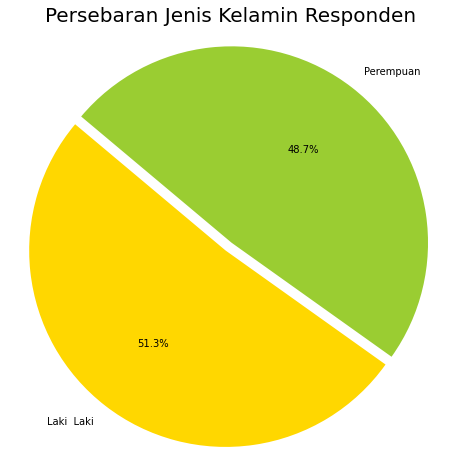

In [ ]:
# Plot
plt.figure(figsize=(8,8))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode=[0 for i in range (len(dataset["Jenis kelamin ?"].value_counts().index))]
explode[0]=0.05
plt.pie(dataset["Jenis kelamin ?"].value_counts(),labels=dataset["Jenis kelamin ?"].value_counts().index,autopct='%1.1f%%', startangle=140,colors=colors,explode=explode)
plt.axis('equal')
plt.title("Persebaran Jenis Kelamin Responden", fontsize=20)

plt.show()

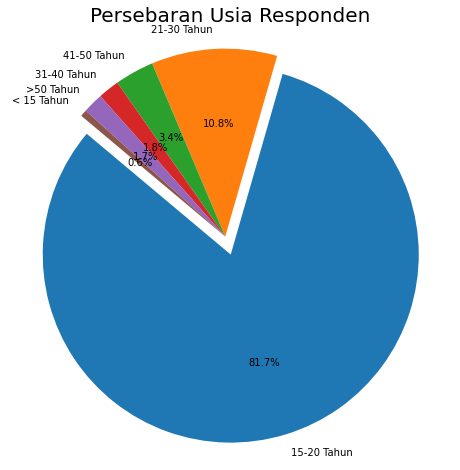

In [ ]:
# Plot
plt.figure(figsize=(8,8))
explode=[0 for i in range (len(dataset["Usia :"].value_counts().index))]
explode[0]=0.1

plt.pie(dataset["Usia :"].value_counts(),labels=dataset["Usia :"].value_counts().index,autopct='%1.1f%%', startangle=140,explode=explode)


plt.axis('equal')
plt.title("Persebaran Usia Responden", fontsize=20)

plt.show()

In [ ]:
pekerjaan=dataset["Pekerjaan?"]
jumlahpekerja=pekerjaan.value_counts()
for i in range (7,len(jumlahpekerja)):
  jumlahpekerja[6]+=jumlahpekerja[i]
jumlahpekerja_index=jumlahpekerja.index.tolist()
jumlahpekerja_column=jumlahpekerja.tolist()
jumlahpekerja_index[5]="Lainnya"
while(len(jumlahpekerja_index)!=6):
  jumlahpekerja_index.pop()
  jumlahpekerja_column.pop()
jumlahpekerja_index

['Pelajar / Mahasiswa',
 'Karyawan Swasta',
 'Profesi  Dokter, Dosen, Pengacara, Dll',
 'Ibu Rumah Tangga',
 'Pengusaha',
 'Lainnya']

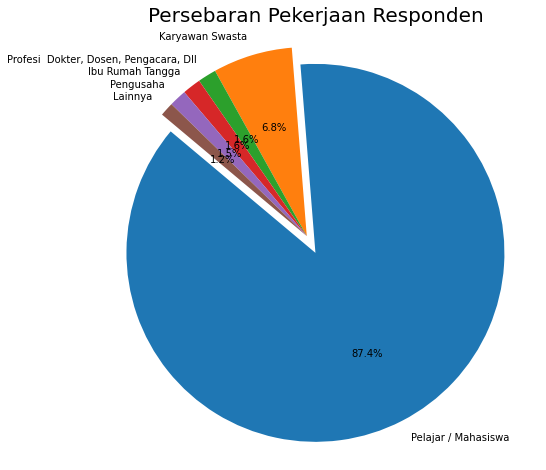

In [ ]:
# Plot
plt.figure(figsize=(8,8))
explode=[0 for i in range (len(jumlahpekerja_index))]
explode[0]=0.1

plt.pie(jumlahpekerja_column,labels=jumlahpekerja_index,autopct='%1.1f%%', startangle=140,explode=explode)
plt.axis('equal')
plt.title("Persebaran Pekerjaan Responden", fontsize=20)

plt.show()

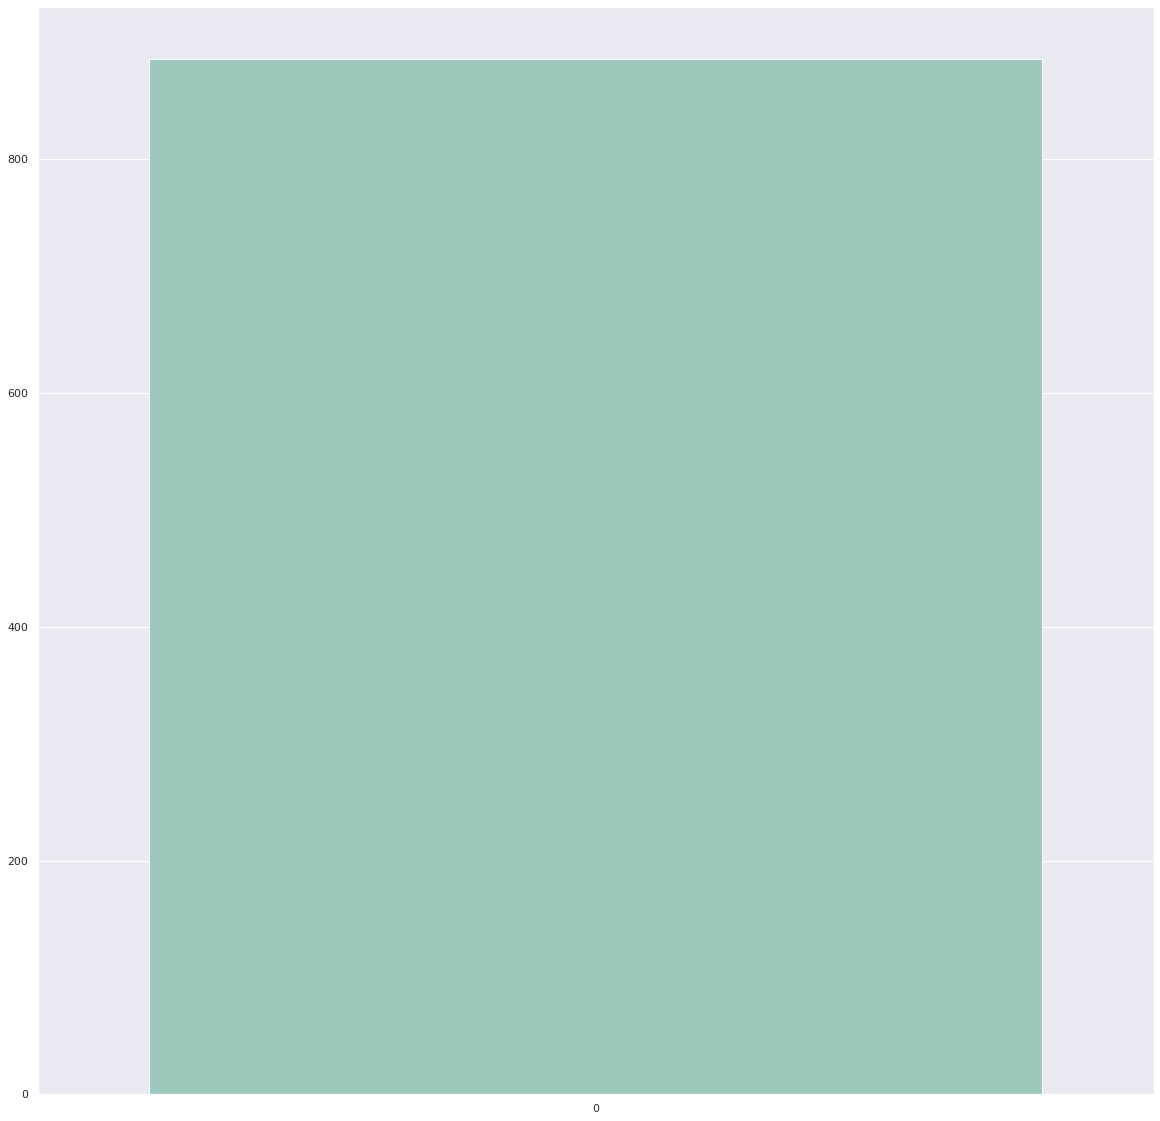

In [ ]:
sns.set(rc={'figure.figsize':(20,20)})
ax=sns.barplot(y=jumlahpekerja_column,x=jumlahpekerja_index, data=dataset,palette="GnBu_d",)
sns.barplot()

In [ ]:
provider=[]
for j in dataset["Nama Broadband"]:
  if (isinstance(j,str)):
    data=j.split(',')
    for i in range (len(data)):
      provider.append(data[i])

In [ ]:
provider=pd.Series(provider)

In [ ]:
provider.value_counts()

Telkomsel                   275
Telkom Indihome              97
Indihome                     94
First Media                  71
 Telkom Indihome             59
                           ... 
Bnettfit                      1
Riau1                         1
Telkomsel Sm First Media      1
 Im3                          1
                              1
Length: 216, dtype: int64

In [ ]:
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = cmaps['Sequential']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

NameError: ignored

In [ ]:
[p                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          ]
dataset.describe()

In [ ]:
dataset["Pekerjaan?"].value_counts()

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
text= ""
for j in (dataset["Pekerjaan?"]):
  #if (isinstance(j,str) and (len(j.split()) == 1)):
    text=text+j+" "

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:

wordcloud = WordCloud(max_font_size=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
dataset["Toko online: Lainnya, Mohon Sebutkan"]